In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_excel("wfp_food_prices_ind_45k.xlsx")
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,Delhi,28666667.0,77216667.0,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2545
1,1994-01-15,Delhi,Delhi,Delhi,28666667.0,77216667.0,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1590
2,1994-01-15,Delhi,Delhi,Delhi,28666667.0,77216667.0,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4294
3,1994-01-15,Delhi,Delhi,Delhi,28666667.0,77216667.0,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.9860
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23033333.0,72616667.0,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2163


In [5]:
#statistik deskriptif dalam dataset
df.describe()

,date,latitude,longitude,price,usdprice
count,45000,4.495800e+04,4.495800e+04,45000.000000,45000.000000
mean,2011-01-04 14:26:25.920000,2.015533e+07,1.769240e+13,99.610980,14524.319601
min,1994-01-15 00:00:00,1.035000e+01,7.303000e+01,2.500000,0.056300
25%,2009-05-15 00:00:00,1.897500e+04,7.261667e+07,16.110000,0.317300
50%,2013-03-15 00:00:00,1.886667e+07,7.717222e+07,30.000000,0.519750
75%,2014-07-15 00:00:00,2.628667e+07,8.511667e+07,65.000000,10859.000000
max,2015-08-15 00:00:00,3.069421e+08,7.998641e+14,4066.070000,887788.000000
std,NaN,3.263236e+07,1.162434e+14,319.530613,60118.270796


In [6]:
#jumlah nilai hilang pada setiap kolom
df.isnull().sum()

,0
date,0
admin1,42
admin2,42
market,0
latitude,42
longitude,42
category,0
commodity,0
unit,0
priceflag,0


In [7]:
# Menghapus duplikasi
df.drop_duplicates(inplace=True)

numeric_features = ['latitude', 'longitude']
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# Mengisi nilai hilang pada kolom kategorikal dengan modus
categorical_features = ['category', 'commodity']
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Memeriksa kembali jumlah nilai yang hilang
print(df.isnull().sum())

date          0
admin1       42
admin2       42
market        0
latitude      0
longitude     0
category      0
commodity     0
unit          0
priceflag     0
pricetype     0
currency      0
price         0
usdprice      0
dtype: int64


<ipython-input-7-601a906635ec>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [8]:
X = df[['latitude', 'longitude', 'category', 'commodity']]
y = df['usdprice']

In [27]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran set pelatihan dan set pengujian
print(f'Size of training set: {X_train.shape[0]}')
print(f'Size of test set: {X_test.shape[0]}')

Size of training set: 120
Size of test set: 30


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error dan R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**Klasifikasi**

In [12]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Membuat kolom klasifikasi berdasarkan usdprice
df['price_change'] = df['usdprice'].apply(
    lambda x: 'Penurunan' if x < 0 else ('Peningkatan' if x > 0 else 'Stabil')
)

# Menyusun variabel X dan Y
X = df[['latitude', 'longitude', 'commodity', 'category']]
y = df['price_change']

# Mengubah variabel kategorikal menjadi numerik dengan LabelEncoder
encoder = LabelEncoder()
X['commodity'] = encoder.fit_transform(X['commodity'])
X['category'] = encoder.fit_transform(X['category'])

# Membuat Stratified KFold dengan 5 fold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


<ipython-input-12-08bf9a1a63f9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['commodity'] = encoder.fit_transform(X['commodity'])
<ipython-input-12-08bf9a1a63f9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['category'] = encoder.fit_transform(X['category'])


In [13]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

**naive bayes**

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nb_model = GaussianNB()

# Evaluasi model
nb_scores = cross_val_score(nb_model, X, y, cv=stratified_kfold, scoring='accuracy')
print("Cross-validation scores Naive Bayes:", nb_scores)
print("Mean cross-validation score:", nb_scores.mean())
print("Standard deviation of score:", nb_scores.std())

Cross-validation scores Naive Bayes: [0.96666667 0.96666667 0.9        1.         0.9       ]
Mean cross-validation score: 0.9466666666666667
Standard deviation of score: 0.039999999999999994


**decision tree**

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

dt_model = DecisionTreeClassifier(random_state=42)

# Evaluasi model
dt_scores = cross_val_score(dt_model, X, y, cv=stratified_kfold, scoring='accuracy')
print("Cross-validation scores Decision Tree:", dt_scores)
print("Mean cross-validation score:", dt_scores.mean())
print("Standard deviation of score:", dt_scores.std())

Cross-validation scores Decision Tree: [1.         0.96666667 0.93333333 0.96666667 0.9       ]
Mean cross-validation score: 0.9533333333333335
Standard deviation of score: 0.03399346342395189


**svm**

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.datasets import load_iris  # Contoh dataset


svm_model = SVC(random_state=42)

# Evaluasi model
svm_scores = cross_val_score(svm_model, X, y, cv=stratified_kfold, scoring='accuracy')
print("Cross-validation scores SVM:", svm_scores)
print("Mean cross-validation score:", svm_scores.mean())
print("Standard deviation of score:", svm_scores.std())

Cross-validation scores SVM: [1.         0.96666667 0.93333333 1.         0.93333333]
Mean cross-validation score: 0.9666666666666668
Standard deviation of score: 0.029814239699997188


**random forest**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.datasets import load_iris

rf_model = RandomForestClassifier(random_state=42)

# Evaluasi model
rf_scores = cross_val_score(rf_model, X, y, cv=stratified_kfold, scoring='accuracy')
print("Cross-validation scores Random Forest:", rf_scores)
print("Mean cross-validation score:", rf_scores.mean())
print("Standard deviation of score:", rf_scores.std())

Cross-validation scores Random Forest: [0.96666667 0.96666667 0.93333333 0.96666667 0.9       ]
Mean cross-validation score: 0.9466666666666667
Standard deviation of score: 0.02666666666666666


#**Learning Curve**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

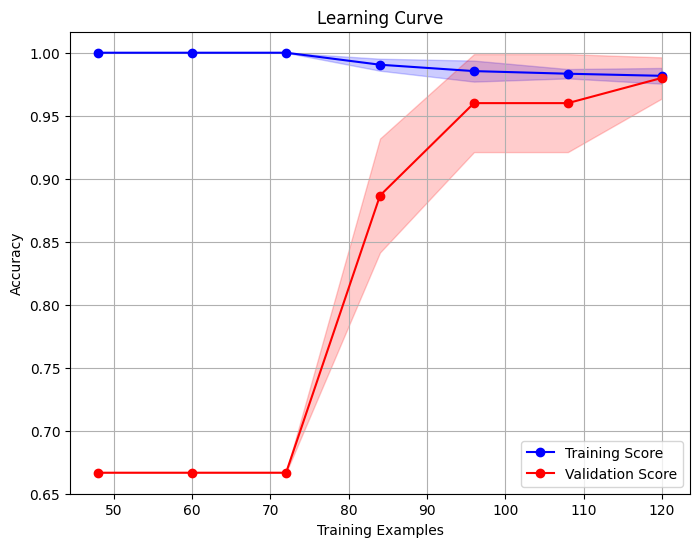

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Memuat dataset
data = load_iris()
X, y = data.data, data.target

# Model yang digunakan
model = SVC(kernel='linear', random_state=42)

# Mendapatkan learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Menghitung rata-rata dan standar deviasi
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


**Interpretasi**

Secara keseluruhan, hasil cross-validation menunjukkan bahwa model SVM memiliki performa terbaik dalam menangani dataset ini, dengan rata-rata akurasi 96.67% dan variasi yang rendah (standar deviasi 2.98%). Hal ini menunjukkan bahwa SVM tidak hanya akurat tetapi juga stabil, menjadikannya model yang sangat andal untuk digunakan pada data ini. Model ini menunjukkan kemampuan generalisasi yang sangat baik tanpa tanda-tanda overfitting.

Model Decision Tree juga memberikan hasil yang sangat baik dengan rata-rata akurasi 95.33%. Namun, terdapat indikasi potensi overfitting, karena beberapa fold mencapai akurasi 100%, sedangkan yang lain lebih rendah. Ini menunjukkan bahwa Decision Tree sangat cocok dengan data pelatihan, tetapi mungkin kurang mampu menangani data baru dengan pola yang berbeda.

Model Random Forest memiliki performa yang hampir sebanding dengan Decision Tree, dengan rata-rata akurasi 94.67% dan standar deviasi yang lebih kecil (2.67%). Variasi yang rendah menunjukkan bahwa model ini stabil dan memiliki kemampuan generalisasi yang baik. Random Forest juga lebih tahan terhadap overfitting dibandingkan Decision Tree karena pendekatan ensemble-nya.

Model Naive Bayes memberikan performa yang baik dengan rata-rata akurasi 94.67%. Meskipun tidak seakurat SVM atau Decision Tree, model ini memberikan hasil yang konsisten dan dapat diandalkan untuk prediksi yang sederhana dan cepat. Dengan standar deviasi 3.99%, stabilitasnya masih dapat diterima.

Grafik learning curve menunjukkan bahwa model memiliki performa pelatihan yang sangat tinggi dengan skor mendekati 1.0, sementara skor validasi awalnya rendah (sekitar 0.65) tetapi meningkat signifikan saat jumlah data pelatihan bertambah, mencapai stabilitas di sekitar 0.9 setelah 100 contoh. Hal ini menunjukkan bahwa model awalnya mengalami kesulitan dalam generalisasi, tetapi dengan lebih banyak data pelatihan, kemampuan generalisasi membaik. Meskipun demikian, terdapat sedikit indikasi overfitting karena skor pelatihan jauh lebih tinggi dibandingkan validasi, terutama pada ukuran data yang lebih kecil. Untuk meningkatkan performa validasi, Anda dapat mencoba menambahkan regularisasi, meningkatkan jumlah data pelatihan, atau melakukan hyperparameter tuning.


**kesimpulan**



*   SVM merupakan model terbaik secara keseluruhan karena memiliki akurasi tertinggi
dan variasi prediksi yang rendah, metode ini menunjukkan kemampuan generalisasi yang sangat baik.
*   Decision Tree memberikan hasil yang sangat akurat, tetapi memiliki risiko overfitting. Penggunaan model ini harus diiringi dengan teknik pruning atau tuning parameter untuk mencegah overfitting.
*   Random Forest adalah alternatif yang sangat baik, bagaimana tidak. metode ini memiliki akurasi yang tinggi dan stabilitas yang unggul tanpa risiko overfitting seperti pada Decision Tree
*   Naive Bayes adalah pilihan sederhana yang tetap efektif, meskipun tidak sekuat model lainnya dalam hal akurasi.